# barplot for t-tests
https://seaborn.pydata.org/generated/seaborn.barplot.html

data from ```../time_analysis/baseline.csv``` and ```../time_analysis/experiment.csv```
columns include:
```[python]
METRIC_COLUMNS = [
    "Total Time",
    "Average Time Per Pair",
    "Consistency",
]
```
save to ```./fig/<column_name>.pdf```


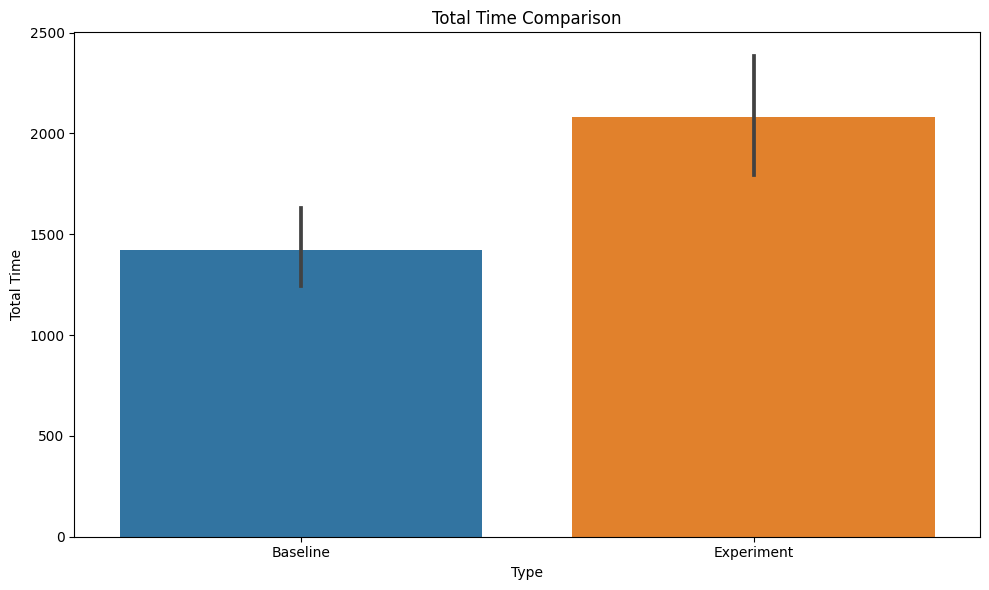

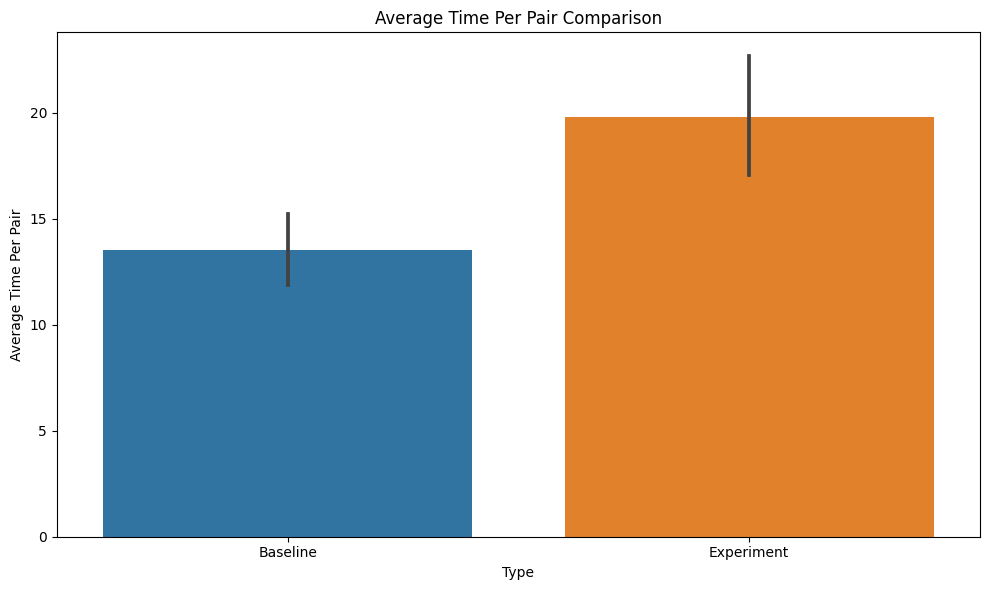

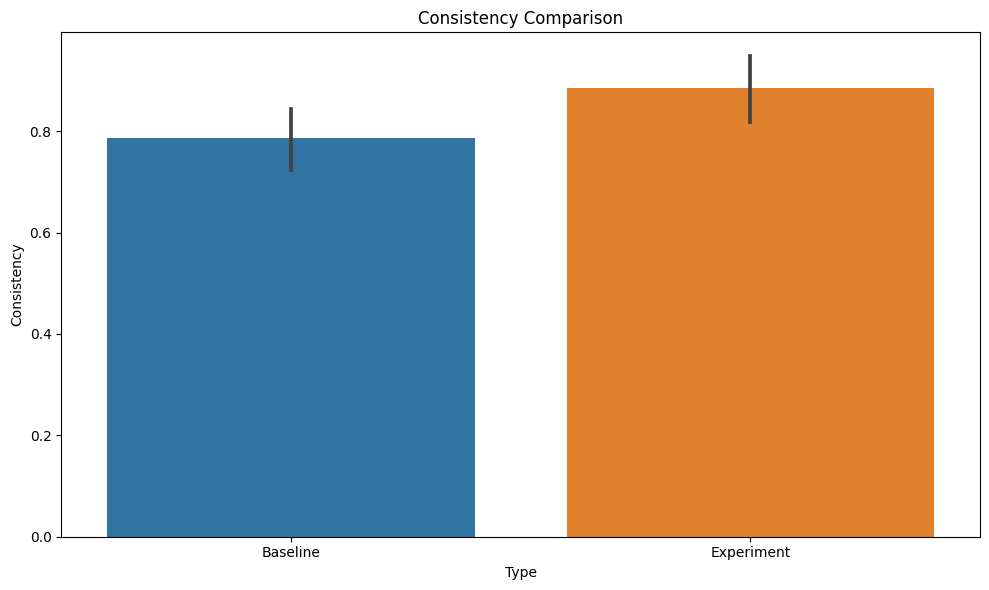

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1. 加载数据
baseline_data = pd.read_csv('../time_analysis/baseline.csv')
experiment_data = pd.read_csv('../time_analysis/experiment.csv')

METRIC_COLUMNS = [
    "Total Time",
    "Average Time Per Pair",
    "Consistency",
]

# 为了简化绘图过程，我们将两个数据集合并为一个，同时为每个数据点添加一个标签
baseline_data['Type'] = 'Baseline'
experiment_data['Type'] = 'Experiment'
combined_data = pd.concat([baseline_data, experiment_data])

# 2. 对于每一个列（metric），绘制并保存条形图
for column in METRIC_COLUMNS:
    plt.figure(figsize=(10, 6))  # 设置图形大小
    sns.barplot(x='Type', y=column, data=combined_data, palette="tab10")
    plt.title(f'{column} Comparison')
    plt.tight_layout()  # 调整图形，使其适应大小
    plt.savefig(f'./fig/barplot/{column}.pdf')  # 保存为PDF文件
    plt.savefig(f'./fig/barplot/{column}.png', dpi=300)  # 保存为PNG文件

    plt.show()  # 显示图形


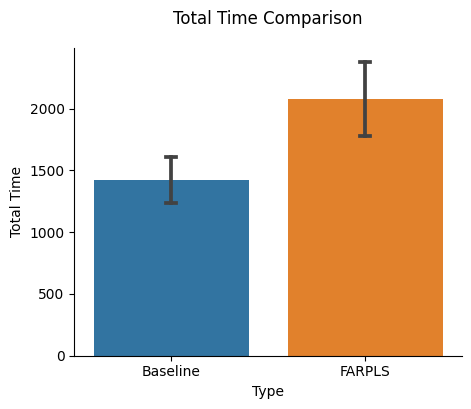

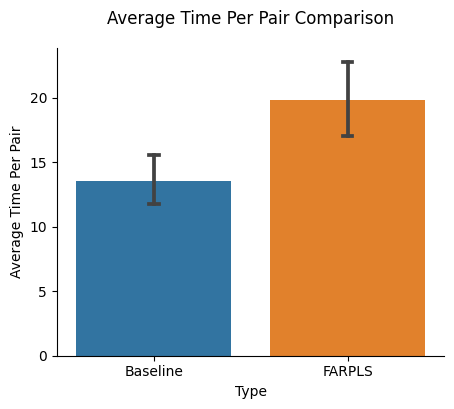

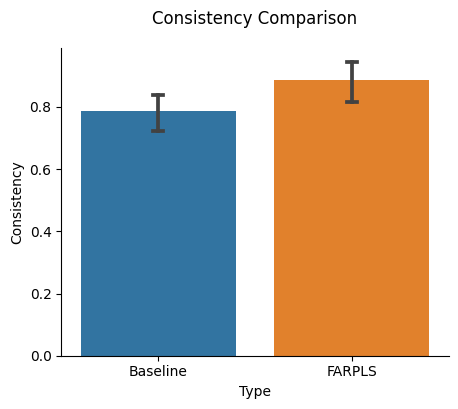

In [40]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1. 加载数据
baseline_data = pd.read_csv('../time_analysis/baseline.csv')
experiment_data = pd.read_csv('../time_analysis/experiment.csv')

METRIC_COLUMNS = [
    "Total Time",
    "Average Time Per Pair",
    "Consistency",
]

# 为了简化绘图过程，我们将两个数据集合并为一个，同时为每个数据点添加一个标签
baseline_data['Type'] = 'Baseline'
experiment_data['Type'] = 'FARPLS'
combined_data = pd.concat([baseline_data, experiment_data])

# 2. 对于每一个列（metric），绘制并保存条形图
for column in METRIC_COLUMNS:
    plt.figure(figsize=(5, 4))  # 设置图形大小
    # bar_plot = sns.barplot(x='Type', y=column, data=combined_data, palette="tab10")
    bar_plot = sns.barplot(x='Type', y=column, data=combined_data, palette="tab10", capsize=0.05)

    # bar_plot = sns.barplot(x='Type', y=column, data=combined_data, palette=["purple", "blue"], dodge=False)

    plt.title(f'{column} Comparison',y = 1.05)
    for p in bar_plot.patches:
        p.set_edgecolor('none')
    mean = combined_data.groupby('Type')[column].mean()
    se = combined_data.groupby('Type')[column].sem()

    confidence_interval = se * 1.96  # Assuming 95% confidence interval

    upper_bound = mean + confidence_interval
    lower_bound = mean - confidence_interval
    addHeight = upper_bound - lower_bound
    # Add ratings to the middle of the bars
    for idx, p in enumerate(bar_plot.patches):
        type_label = combined_data["Type"].iloc[idx]
        addHeight_value = addHeight[type_label]

        # bar_plot.annotate(format(p.get_height(), '.2f'),
        #                 (p.get_x() + p.get_width() / 2., p.get_height()*1.2),
        #                 ha='center', va='center',
        #                 xytext=(0, 10),
        #                 textcoords='offset points')
        
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    # plt.gca().spines['bottom'].set_visible(False)
    # plt.gca().spines['left'].set_visible(False)


    
    # plt.tight_layout()  # 调整图形，使其适应大小
    plt.savefig(f'./fig/barplot/{column}.pdf')  # 保存为PDF文件
    plt.savefig(f'./fig/barplot/{column}.png', dpi=300)  # 保存为PNG文件

    plt.show()  # 显示图形


In [ ]:
# 以下是废弃代码

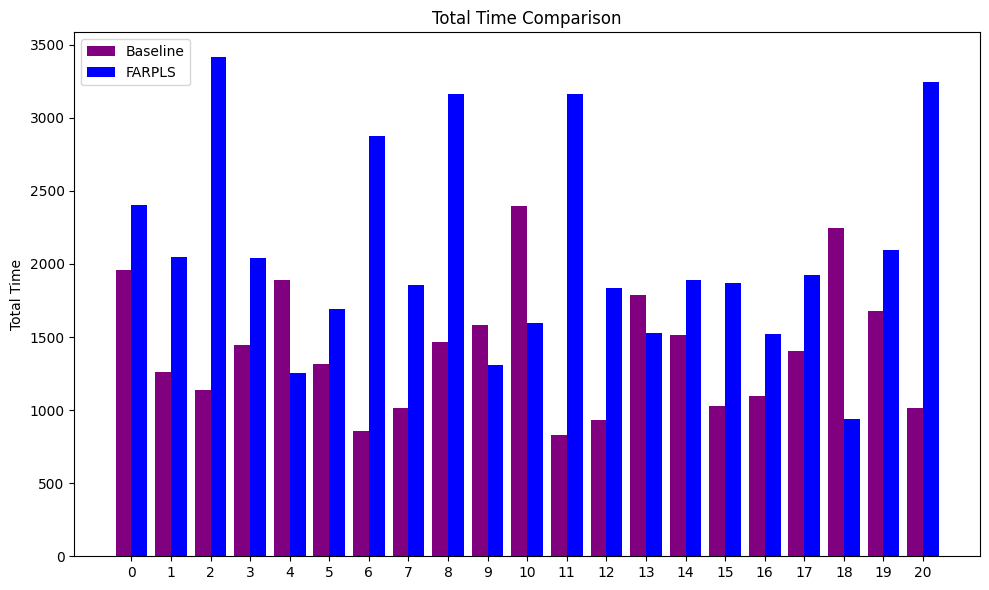

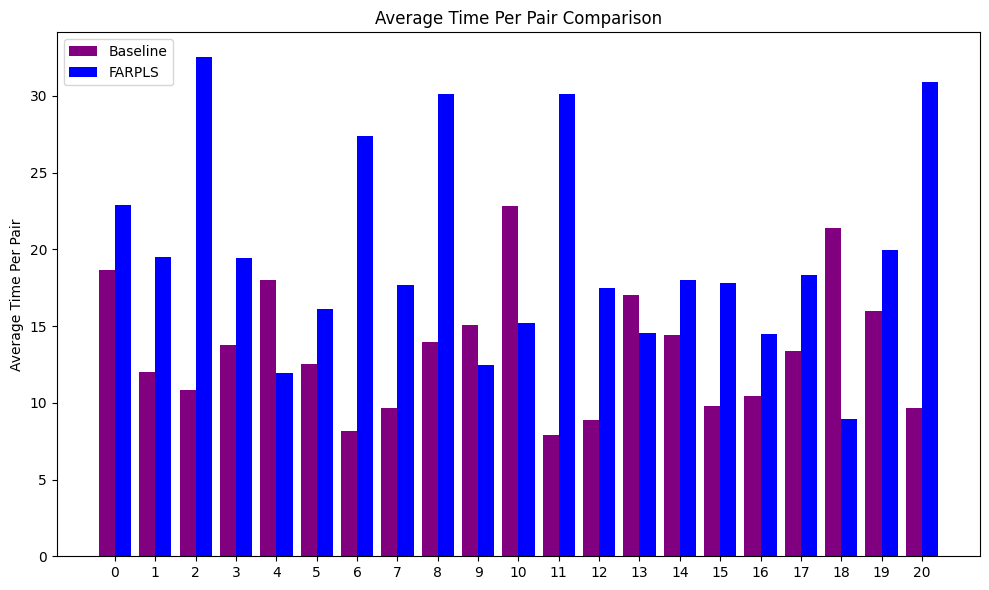

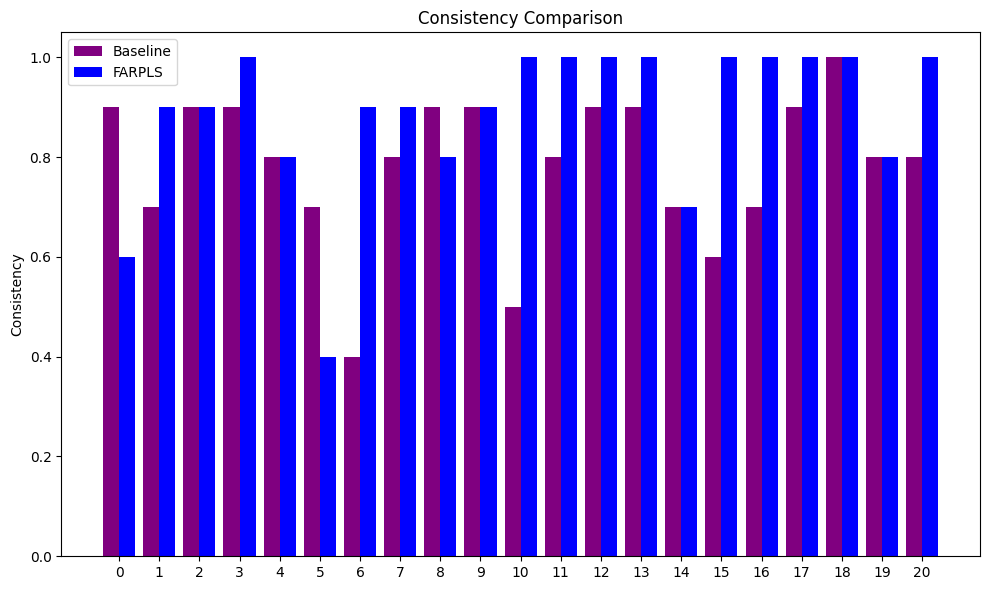

In [13]:
import numpy as np

# 1. 加载数据
baseline_data = pd.read_csv('../time_analysis/baseline.csv')
experiment_data = pd.read_csv('../time_analysis/experiment.csv')

METRIC_COLUMNS = [
    "Total Time",
    "Average Time Per Pair",
    "Consistency",
]

# 为了简化绘图过程，我们将两个数据集合并为一个，同时为每个数据点添加一个标签
baseline_data['Type'] = 'Baseline'
experiment_data['Type'] = 'FARPLS'
combined_data = pd.concat([baseline_data, experiment_data])

# 2. 对于每一个列（metric），绘制并保存条形图
for column in METRIC_COLUMNS:
    plt.figure(figsize=(10, 6))  # 设置图形大小

    width = 0.4  # 定义柱子的宽度
    types = combined_data['Type'].unique()
    
    # 循环绘制每一个类型的柱子
    for i, data_type in enumerate(types):
        subset = combined_data[combined_data['Type'] == data_type]
        positions = np.arange(len(subset)) + i * width
        plt.bar(positions, subset[column], width=width, label=data_type, color=["purple" if data_type == "Baseline" else "blue"])
        
    # 调整x轴的标签和位置
    plt.xticks(np.arange(len(baseline_data)) + width / 2, baseline_data.index)
    plt.ylabel(column)
    plt.title(f'{column} Comparison')
    plt.legend()

    plt.tight_layout()  # 调整图形，使其适应大小
    plt.savefig(f'./fig/barplot/{column}.pdf')  # 保存为PDF文件
    plt.savefig(f'./fig/barplot/{column}.png', dpi=300)  # 保存为PNG文件
    plt.show()  # 显示图形
